In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv('MagicBricks.csv')

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
#shape of the dataframe(1259 rows and 11 columns)
df.shape

(1259, 11)

In [5]:
#check the correlation between features
df.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


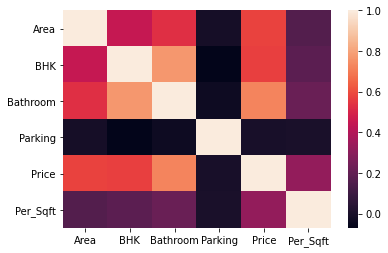

In [6]:
#visual representation of the correlation matrix
sns.heatmap(df.corr())

In [7]:
#check the value counts for all the features
for i in df.columns:
    print(df[i].value_counts())
    print()

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
530.0       1
972.0       1
324.0       1
4800.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64

3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [9]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [10]:
#drop the unnecessary columns
df.drop(['Per_Sqft', 'Status', 'Parking', 'Type'], axis=1, inplace=True)

In [11]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,New_Property
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,New_Property
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Resale
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Resale
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,New_Property


In [12]:
#check the number of null values for each feature
df.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Price          0
Transaction    0
dtype: int64

In [13]:
df[df['Bathroom'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,13500000,Resale
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,13500000,Resale


In [14]:
df[df['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",2900000,Resale
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",17000000,Resale
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",25000000,Resale
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",10000000,Resale
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",13500000,Resale


In [15]:
df.duplicated().sum()

114

In [16]:
df.shape

(1259, 7)

In [17]:
#drop the duplicate entries
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(1145, 7)

In [19]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       1
Furnishing     5
Locality       0
Price          0
Transaction    0
dtype: int64

In [20]:
df[df['Bathroom'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,13500000,Resale


In [21]:
df[df['BHK']==1].Bathroom.median()

1.0

In [22]:
#fill the nul value with median
df['Bathroom'].fillna(1, inplace=True)

In [23]:
df[df['Bathroom'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction


In [24]:
df[df['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",2900000,Resale
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",17000000,Resale
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",25000000,Resale
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",10000000,Resale
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",13500000,Resale


In [25]:
df['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

(array([976., 153.,   6.,   3.,   1.,   0.,   1.,   1.,   1.,   3.]),
 array([  11.25 ,  617.625, 1224.   , 1830.375, 2436.75 , 3043.125,
        3649.5  , 4255.875, 4862.25 , 5468.625, 6075.   ]),
 <a list of 10 Patch objects>)

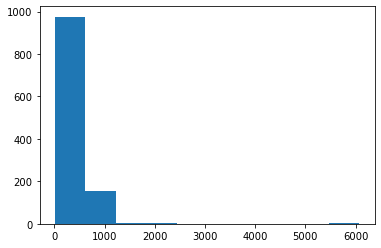

In [26]:
plt.hist(df['Area']/df['BHK'])

{'whiskers': [<matplotlib.lines.Line2D at 0x148fd23fcc8>,
 'caps': [<matplotlib.lines.Line2D at 0x148fd243f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x148fd23f488>],
 'medians': [<matplotlib.lines.Line2D at 0x148fd248948>],
 'fliers': [<matplotlib.lines.Line2D at 0x148fd248a88>],
 'means': []}

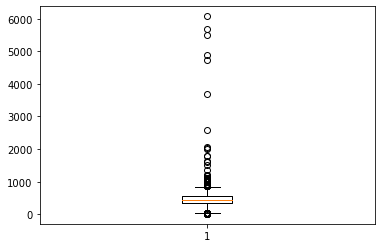

In [27]:
plt.boxplot(df['Area']/df['BHK'])

(array([1.128e+03, 8.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.04081633e+02, 5.40298273e+04, 1.07855573e+05, 1.61681319e+05,
        2.15507064e+05, 2.69332810e+05, 3.23158556e+05, 3.76984301e+05,
        4.30810047e+05, 4.84635793e+05, 5.38461538e+05]),
 <a list of 10 Patch objects>)

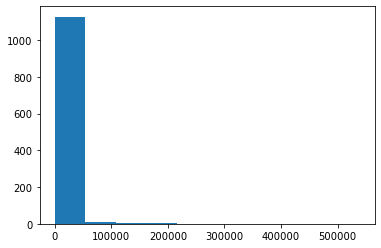

In [28]:
plt.hist(df['Price']/df['Area'])

In [29]:
Q1 = (df['Area']/df['BHK']).quantile(q=0.25)
print(Q1)

350.0


In [30]:
Q3 = (df['Area']/df['BHK']).quantile(q=0.75)
print(Q3)

550.0


In [31]:
IQR = Q3-Q1
print(IQR)

200.0


In [32]:
Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

print(Upper_Limit)
print(Lower_Limit)

850.0
50.0


In [33]:
df['area/bhk'] = df['Area']/df['BHK']
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,area/bhk
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,New_Property,266.666667
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,New_Property,375.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Resale,475.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Resale,300.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,New_Property,325.000000


In [34]:
df.drop(df[df['area/bhk']<50].index, inplace=True)
df.shape

(1129, 8)

In [35]:
df.drop(df[df['area/bhk']>850].index, inplace=True)
df.shape

(1075, 8)

In [36]:
Q1 = (df['Price']/df['Area']).quantile(q=0.25)
Q3 = (df['Price']/df['Area']).quantile(q=0.75)

IQR = Q3-Q1

Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

print(Upper_Limit)
print(Lower_Limit)

32466.587915234824
-8759.128006872854


In [37]:
df['price/area'] = df['Price']/df['Area']
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,area/bhk,price/area
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,New_Property,266.666667,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,New_Property,375.000000,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Resale,475.000000,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Resale,300.000000,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,New_Property,325.000000,9538.461538


In [38]:
df.drop(df[df['price/area']>33130].index, inplace=True)
df.shape

(1053, 9)

In [39]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Price          0
Transaction    0
area/bhk       0
price/area     0
dtype: int64

In [40]:
df['BHK'].unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10], dtype=int64)

In [41]:
df[df['BHK']==10]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,area/bhk,price/area
721,1200.0,10,4.0,Semi-Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",17000000,Resale,120.0,14166.666667


In [42]:
df.shape

(1053, 9)

In [43]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Price          0
Transaction    0
area/bhk       0
price/area     0
dtype: int64

In [44]:
df[df['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,area/bhk,price/area
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",2900000,Resale,225.0,6444.444444
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",17000000,Resale,108.0,31481.481481
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",25000000,Resale,450.0,18518.518519
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",10000000,Resale,750.0,4444.444444
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",13500000,Resale,500.0,9000.000000


In [45]:
df['Furnishing'].value_counts()

Semi-Furnished    593
Unfurnished       296
Furnished         159
Name: Furnishing, dtype: int64

In [46]:
print(df[df['Furnishing']=='Unfurnished']['price/area'].min())
print(df[df['Furnishing']=='Unfurnished']['price/area'].max())

2777.777777777778
31941.031941031943


In [47]:
print(df[df['Furnishing']=='Semi-Furnished']['price/area'].min())
print(df[df['Furnishing']=='Semi-Furnished']['price/area'].max())

2235.294117647059
32261.904761904763


In [48]:
print(df[df['Furnishing']=='Furnished']['price/area'].min())
print(df[df['Furnishing']=='Furnished']['price/area'].max())

1259.2592592592594
30555.555555555555


In [49]:
df['Furnishing'].fillna('Semi-Furnished', inplace=True)

In [50]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Price          0
Transaction    0
area/bhk       0
price/area     0
dtype: int64

In [51]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction,area/bhk,price/area
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,New_Property,266.666667,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,New_Property,375.000000,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Resale,475.000000,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Resale,300.000000,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,New_Property,325.000000,9538.461538


In [52]:
df.drop(['area/bhk', 'price/area'], axis=1, inplace=True)

In [53]:
len(df['Locality'].unique())

353

In [77]:
df['Locality'] = df['Locality'].apply(lambda x:  x.split(', ')[-1])

In [78]:
len(df['Locality'].unique())

156

In [79]:
location_count = df['Locality'].value_counts()
location_count

Shahdara                                                                                                                                                                                                                                                                                    67
Rohini Sector 24                                                                                                                                                                                                                                                                            37
Dwarka                                                                                                                                                                                                                                                                                      34
Saket                                                                                                                                      

In [80]:
len(location_count[location_count < 5])

111

In [81]:
location_count_less_than_5 = location_count[location_count < 5]
location_count_less_than_5

Dwarka Sector 24                                                                                                                                                                                                                                                                            4
Sultanpur Extension                                                                                                                                                                                                                                                                         4
Punjabi Bagh East                                                                                                                                                                                                                                                                           4
Okhla Phase 1                                                                                                                                 

In [82]:
df['Locality'] = df['Locality'].apply(lambda x: 'Other' if x in location_count_less_than_5 else x)
df['Locality']

0                   Other
1        Rohini Sector 24
2                   Other
3        Rohini Sector 24
4                   Other
              ...        
1252              Kalkaji
1253    Chittaranjan Park
1255    Chittaranjan Park
1256    Chittaranjan Park
1257                Other
Name: Locality, Length: 1053, dtype: object

In [83]:
print(len(df['Locality'].unique()))
df['Locality'].unique()

46


array(['Other', 'Rohini Sector 24', 'Lajpat Nagar', 'Lajpat Nagar 3',
       'Lajpat Nagar 2', 'Dwarka Sector 12', 'Dwarka', 'Budh Vihar',
       'Budh Vihar Phase 1', 'Rohini Sector 23', 'Uttam Nagar',
       'Dwarka Mor', 'Okhla', 'Karol Bagh', 'Patel Nagar', 'Vasant Kunj',
       'New Friends Colony', 'Greater Kailash', 'Shahdara', 'Laxmi Nagar',
       'Uttam Nagar West', 'Patel Nagar West', 'Saket',
       'Safdarjung Enclave', 'Paschim Vihar',
       'Commonwealth Games Village 2010', 'Alaknanda', 'Mathura Road',
       'Sultanpur', 'Chhattarpur', 'Chhattarpur Enclave Phase2',
       'Mehrauli', 'Mahavir Enclave', 'Mahavir Enclave Part 1', 'Narela',
       'Malviya Nagar', 'Dilshad Garden', 'Vasundhara Enclave',
       'Kirti Nagar', 'Sheikh Sarai Phase 1', 'Sheikh Sarai',
       'Punjabi Bagh West', 'Punjabi Bagh', 'Kalkaji', 'Hauz Khas',
       'Chittaranjan Park'], dtype=object)

In [84]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
0,800.0,3,2.0,Semi-Furnished,Other,6500000,New_Property
1,750.0,2,2.0,Semi-Furnished,Rohini Sector 24,5000000,New_Property
2,950.0,2,2.0,Furnished,Other,15500000,Resale
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Resale
4,650.0,2,2.0,Semi-Furnished,Other,6200000,New_Property


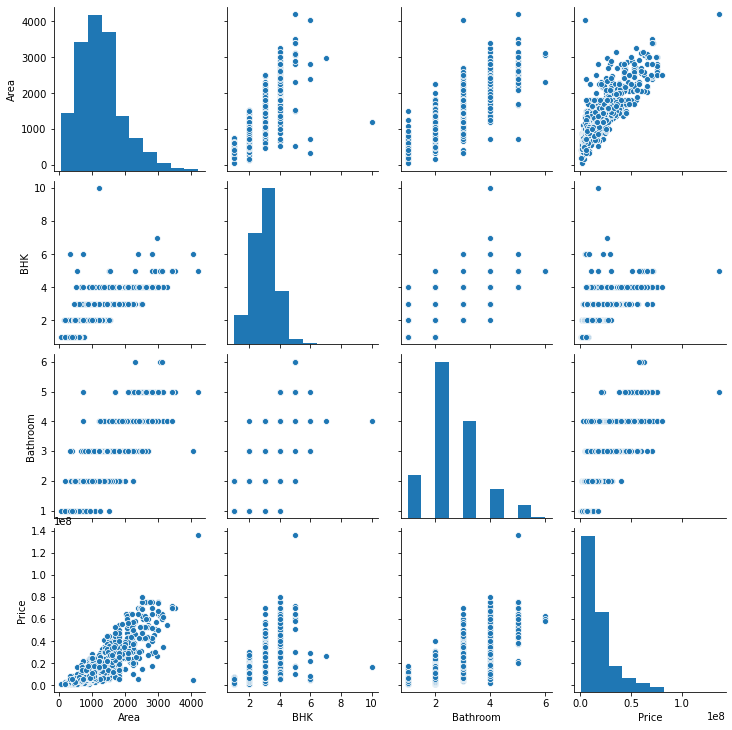

In [85]:
sns.pairplot(df)

In [86]:
target = df['Price']

In [87]:
df.drop('Price', axis=1, inplace=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Transaction
0,800.0,3,2.0,Semi-Furnished,Other,New_Property
1,750.0,2,2.0,Semi-Furnished,Rohini Sector 24,New_Property
2,950.0,2,2.0,Furnished,Other,Resale
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,Resale
4,650.0,2,2.0,Semi-Furnished,Other,New_Property


In [88]:
target.head()

0     6500000
1     5000000
2    15500000
3     4200000
4     6200000
Name: Price, dtype: int64

In [89]:
locations = pd.get_dummies(df['Locality'], drop_first=True)
locations

,Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,Commonwealth Games Village 2010,Dilshad Garden,Dwarka,Dwarka Mor,Dwarka Sector 12,...,Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai,Sheikh Sarai Phase 1,Sultanpur,Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1253,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df = pd.concat([df,locations],axis='columns')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Transaction,Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,...,Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai,Sheikh Sarai Phase 1,Sultanpur,Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave
0,800.0,3,2.0,Semi-Furnished,Other,New_Property,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,Semi-Furnished,Rohini Sector 24,New_Property,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,Furnished,Other,Resale,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,Resale,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,Semi-Furnished,Other,New_Property,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df.drop('Locality', axis=1, inplace=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Transaction,Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,...,Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai,Sheikh Sarai Phase 1,Sultanpur,Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave
0,800.0,3,2.0,Semi-Furnished,New_Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,Semi-Furnished,New_Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,Furnished,Resale,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,Semi-Furnished,Resale,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,Semi-Furnished,New_Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
furnish = {'Unfurnished':0, 'Semi-Furnished':1, 'Furnished':2}
property_type = {'Resale':0, 'New_Property':1}

In [93]:
df['Furnishing'] = df['Furnishing'].map(furnish)
df['Property_Type'] = df['Transaction'].map(property_type)

In [94]:
df.head()

,Area,BHK,Bathroom,Furnishing,Transaction,Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,...,Saket,Shahdara,Sheikh Sarai,Sheikh Sarai Phase 1,Sultanpur,Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,Property_Type
0,800.0,3,2.0,1,New_Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,750.0,2,2.0,1,New_Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,950.0,2,2.0,2,Resale,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,1,Resale,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,1,New_Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
df.drop('Transaction', axis=1, inplace=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,Commonwealth Games Village 2010,...,Saket,Shahdara,Sheikh Sarai,Sheikh Sarai Phase 1,Sultanpur,Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,Property_Type
0,800.0,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,750.0,2,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,950.0,2,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=0)

In [98]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(789, 50)
(789,)
(264, 50)
(264,)


In [99]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [100]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
y_pred = rf.predict(X_test)

In [102]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9697839141978587
0.7440642776298824


In [103]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1, 3, 5, 7, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [104]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [105]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 230,
 'criterion': 'mse'}

In [106]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [107]:
best_random_grid=rf_randomcv.best_estimator_

In [108]:
y_pred=best_random_grid.predict(X_test)
print(best_random_grid.score(X_test, y_test))

0.8204280847341932


In [109]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 230,
 'criterion': 'mse'}

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 300, rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200, rf_randomcv.best_params_['n_estimators'] + 300]
}

print(param_grid)

{'criterion': ['mse'], 'max_depth': [230], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'n_estimators': [700, 800, 900, 1000, 1100, 1200, 1300]}


In [111]:
#### Fit the grid_search to the data
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 13.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [112]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=230, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
best_grid=grid_search.best_estimator_

In [114]:
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=230, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
y_pred=best_grid.predict(X_test)
print(best_grid.score(X_test, y_test))

0.8212982527053498


In [118]:
columns = df.columns
columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Budh Vihar',
       'Budh Vihar Phase 1', 'Chhattarpur', 'Chhattarpur Enclave Phase2',
       'Chittaranjan Park', 'Commonwealth Games Village 2010',
       'Dilshad Garden', 'Dwarka', 'Dwarka Mor', 'Dwarka Sector 12',
       'Greater Kailash', 'Hauz Khas', 'Kalkaji', 'Karol Bagh', 'Kirti Nagar',
       'Lajpat Nagar', 'Lajpat Nagar 2', 'Lajpat Nagar 3', 'Laxmi Nagar',
       'Mahavir Enclave', 'Mahavir Enclave Part 1', 'Malviya Nagar',
       'Mathura Road', 'Mehrauli', 'Narela', 'New Friends Colony', 'Okhla',
       'Other', 'Paschim Vihar', 'Patel Nagar', 'Patel Nagar West',
       'Punjabi Bagh', 'Punjabi Bagh West', 'Rohini Sector 23',
       'Rohini Sector 24', 'Safdarjung Enclave', 'Saket', 'Shahdara',
       'Sheikh Sarai', 'Sheikh Sarai Phase 1', 'Sultanpur', 'Uttam Nagar',
       'Uttam Nagar West', 'Vasant Kunj', 'Vasundhara Enclave',
       'Property_Type'],
      dtype='object')

In [122]:
print(len(columns))

50


In [127]:
def predict_price(area, bhk, bathroom, furnishing, locality, property_type): 
    loc_index = np.where(columns==locality)[0][0]

    x = np.zeros(len(columns))
    x[0] = area
    x[1] = bhk
    x[2] = bathroom
    if x[3] == 'Furnished':
        x[3] = 2
    elif x[3] == 'Semi - Furnished':
        x[3] = 1
    if loc_index >= 0:
        x[loc_index] = 1
    if x[49] == 'New_Property':
        x[49] = 1

    return int(round(best_grid.predict([x])[0], -5))

In [128]:
predict_price(1800, 3, 3, 'Furnished', 'Budh Vihar', 'New_Property')

21100000

In [131]:
import pickle
with open('delhi_house_price_model.pickle','wb') as f:
    pickle.dump(best_grid,f)